In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('lung_cancer_mortality_data_large_v2.csv')

In [3]:
dataset.head()

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Female,Germany,2016-04-07,Stage III,2016-04-21,No,Never Smoked,31.1,257,1,1,0,0,Combined,2017-11-15,0
1,2,50.0,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,Yes,Passive Smoker,25.9,208,1,0,0,0,Radiation,2024-04-25,0
2,3,65.0,Male,Romania,2023-04-07,Stage IV,2023-04-12,No,Never Smoked,18.9,193,0,0,0,0,Surgery,2025-03-11,0
3,4,51.0,Female,Latvia,2016-02-07,Stage III,2016-02-13,Yes,Former Smoker,34.6,249,1,1,1,0,Surgery,2017-04-14,1
4,5,37.0,Male,Greece,2023-12-01,Stage I,2023-12-03,Yes,Never Smoked,40.2,262,0,0,0,0,Chemotherapy,2024-09-20,0


In [4]:
dataset.shape

(3250000, 18)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250000 entries, 0 to 3249999
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   id                           int64  
 1   age                          float64
 2   gender                       object 
 3   country                      object 
 4   diagnosis_date               object 
 5   cancer_stage                 object 
 6   beginning_of_treatment_date  object 
 7   family_history               object 
 8   smoking_status               object 
 9   bmi                          float64
 10  cholesterol_level            int64  
 11  hypertension                 int64  
 12  asthma                       int64  
 13  cirrhosis                    int64  
 14  other_cancer                 int64  
 15  treatment_type               object 
 16  end_treatment_date           object 
 17  survived                     int64  
dtypes: float64(2), int64(7), object(9)
memory 

In [6]:
dataset.isnull().sum()

id                             0
age                            0
gender                         0
country                        0
diagnosis_date                 0
cancer_stage                   0
beginning_of_treatment_date    0
family_history                 0
smoking_status                 0
bmi                            0
cholesterol_level              0
hypertension                   0
asthma                         0
cirrhosis                      0
other_cancer                   0
treatment_type                 0
end_treatment_date             0
survived                       0
dtype: int64

In [7]:
data = dataset.copy()

In [8]:
data = data.drop(['id','country','diagnosis_date','beginning_of_treatment_date','treatment_type','end_treatment_date','survived'],axis=1)

In [9]:
data.head()

,age,gender,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer
0,64.0,Female,Stage III,No,Never Smoked,31.1,257,1,1,0,0
1,50.0,Male,Stage III,Yes,Passive Smoker,25.9,208,1,0,0,0
2,65.0,Male,Stage IV,No,Never Smoked,18.9,193,0,0,0,0
3,51.0,Female,Stage III,Yes,Former Smoker,34.6,249,1,1,1,0
4,37.0,Male,Stage I,Yes,Never Smoked,40.2,262,0,0,0,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250000 entries, 0 to 3249999
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   age                float64
 1   gender             object 
 2   cancer_stage       object 
 3   family_history     object 
 4   smoking_status     object 
 5   bmi                float64
 6   cholesterol_level  int64  
 7   hypertension       int64  
 8   asthma             int64  
 9   cirrhosis          int64  
 10  other_cancer       int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 272.8+ MB


In [11]:
data.isna().sum()/len(data)*100

age                  0.0
gender               0.0
cancer_stage         0.0
family_history       0.0
smoking_status       0.0
bmi                  0.0
cholesterol_level    0.0
hypertension         0.0
asthma               0.0
cirrhosis            0.0
other_cancer         0.0
dtype: float64

In [12]:
# Identify numerical and categorical columns
# train_data
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

print(numerical_cols)
print(categorical_cols)

Index(['age', 'bmi', 'cholesterol_level', 'hypertension', 'asthma',
       'cirrhosis', 'other_cancer'],
      dtype='object')
Index(['gender', 'cancer_stage', 'family_history', 'smoking_status'], dtype='object')


In [13]:
data[numerical_cols].head()

,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer
0,64.0,31.1,257,1,1,0,0
1,50.0,25.9,208,1,0,0,0
2,65.0,18.9,193,0,0,0,0
3,51.0,34.6,249,1,1,1,0
4,37.0,40.2,262,0,0,0,0


In [14]:
data[numerical_cols]['cholesterol_level'].value_counts()

cholesterol_level
253    28296
261    28165
272    28161
251    28125
290    28123
       ...  
204    17322
167    17304
236    17272
300    14128
150     8545
Name: count, Length: 151, dtype: int64

In [15]:
data[categorical_cols].head()

,gender,cancer_stage,family_history,smoking_status
0,Female,Stage III,No,Never Smoked
1,Male,Stage III,Yes,Passive Smoker
2,Male,Stage IV,No,Never Smoked
3,Female,Stage III,Yes,Former Smoker
4,Male,Stage I,Yes,Never Smoked


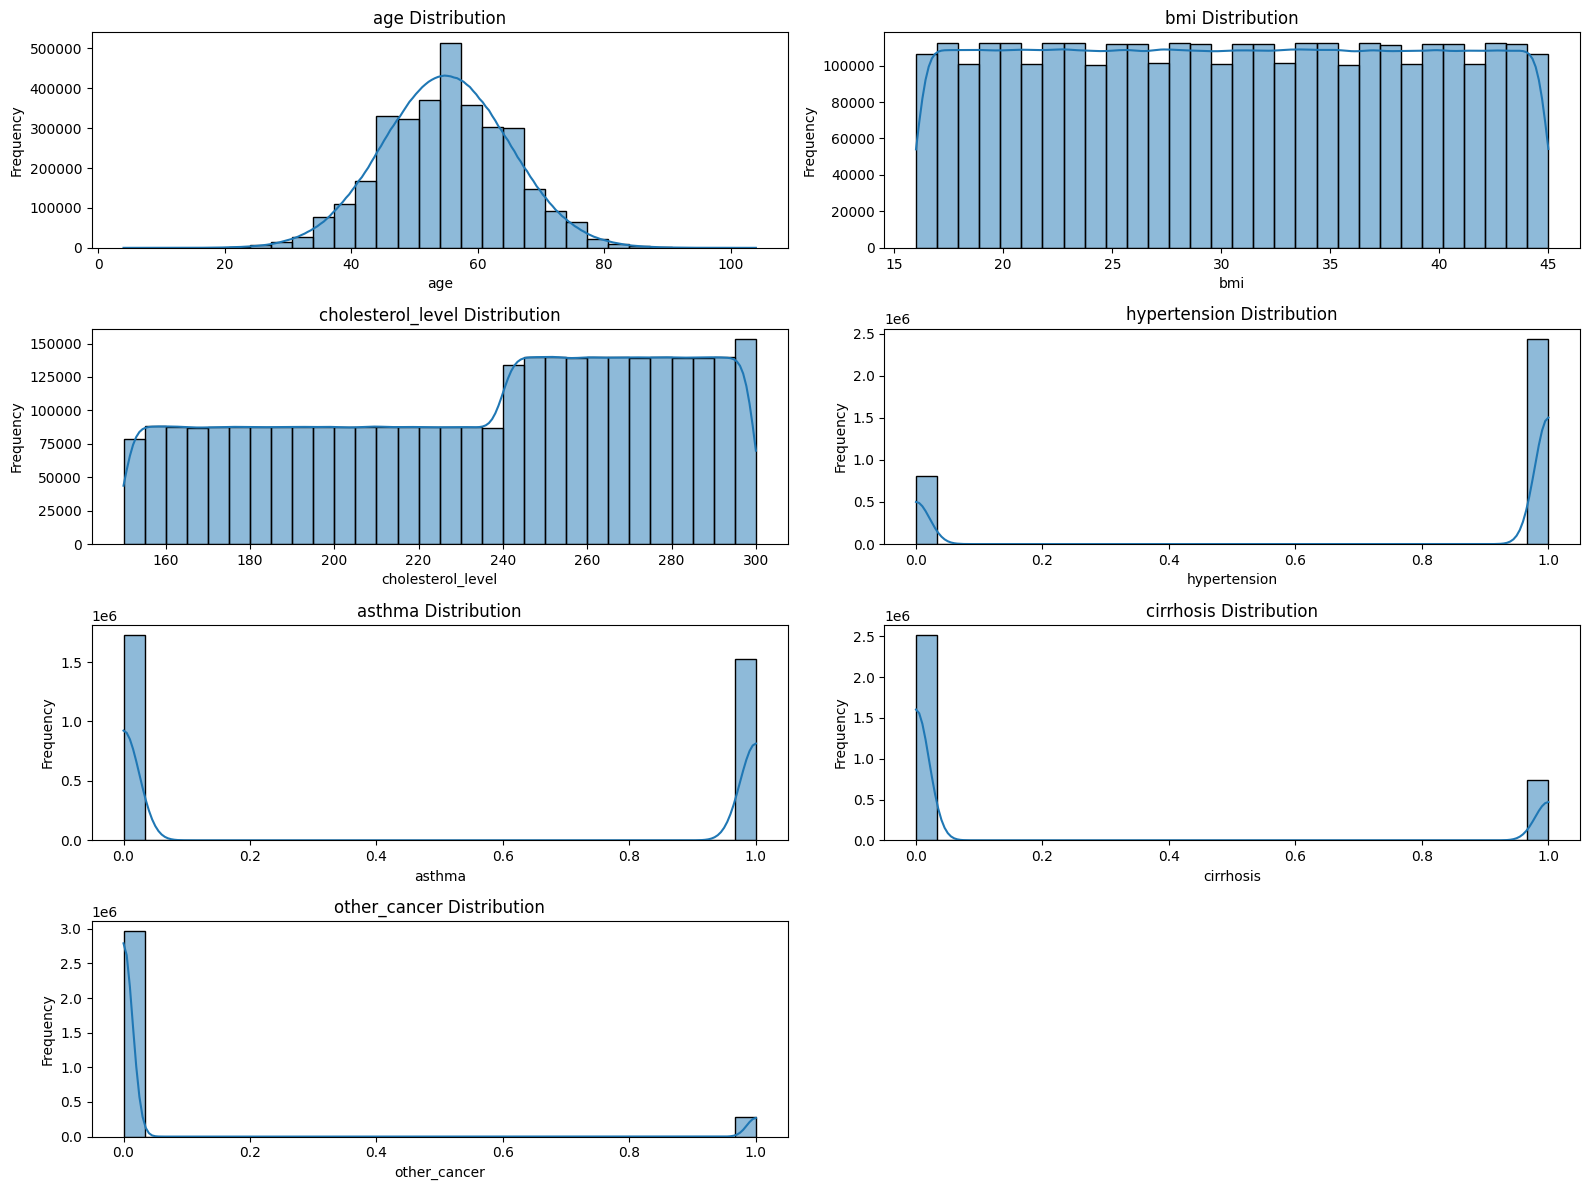

In [16]:
# Plotting the histograms with KDE for each numerical feature

plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 2 + 1, 2, i + 1)  
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

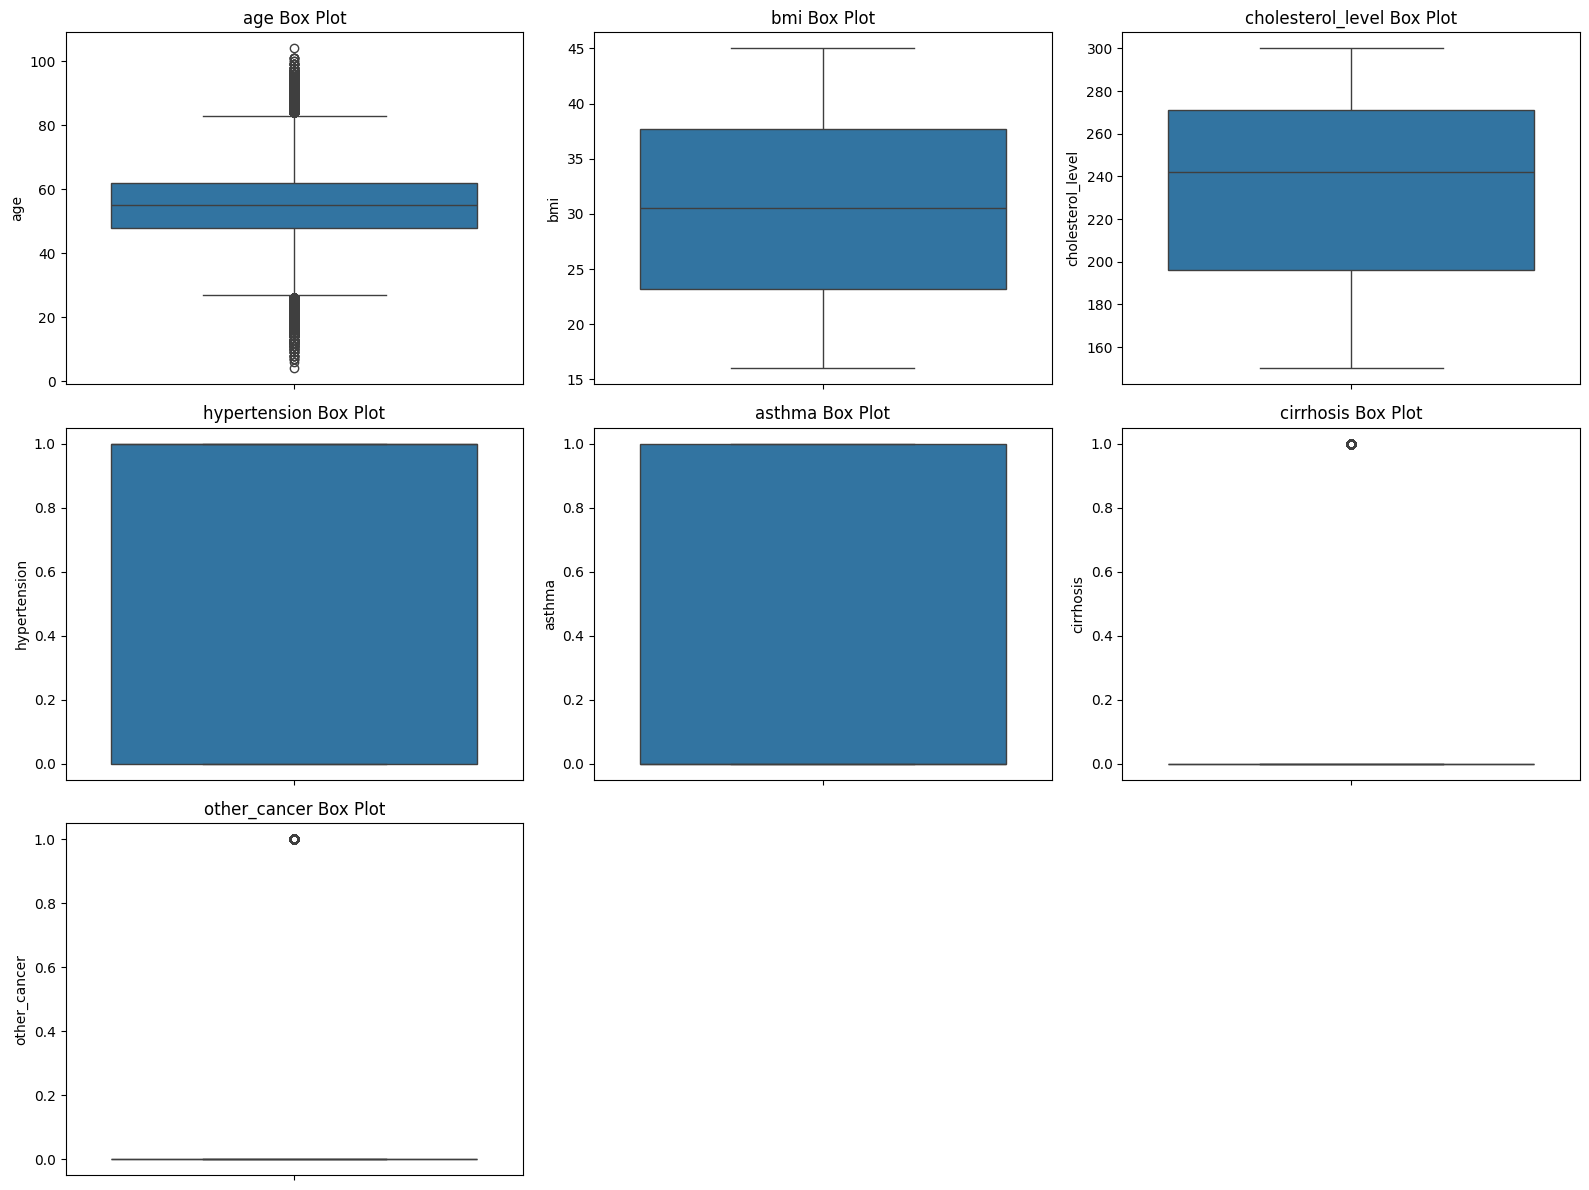

In [17]:
# check outlier in numeric data 
# box plot
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)  
    sns.boxplot(y=data[col])  
    plt.title(f'{col} Box Plot')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [18]:
# cap_outlier
def cap_outliers(df):
    df_capped = df.copy()
    for column in df.select_dtypes(include='number').columns:
        Q1 = df_capped[column].quantile(0.25)
        Q3 = df_capped[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_capped[column] = df_capped[column].clip(lower=lower_bound, upper=upper_bound)

    return df_capped

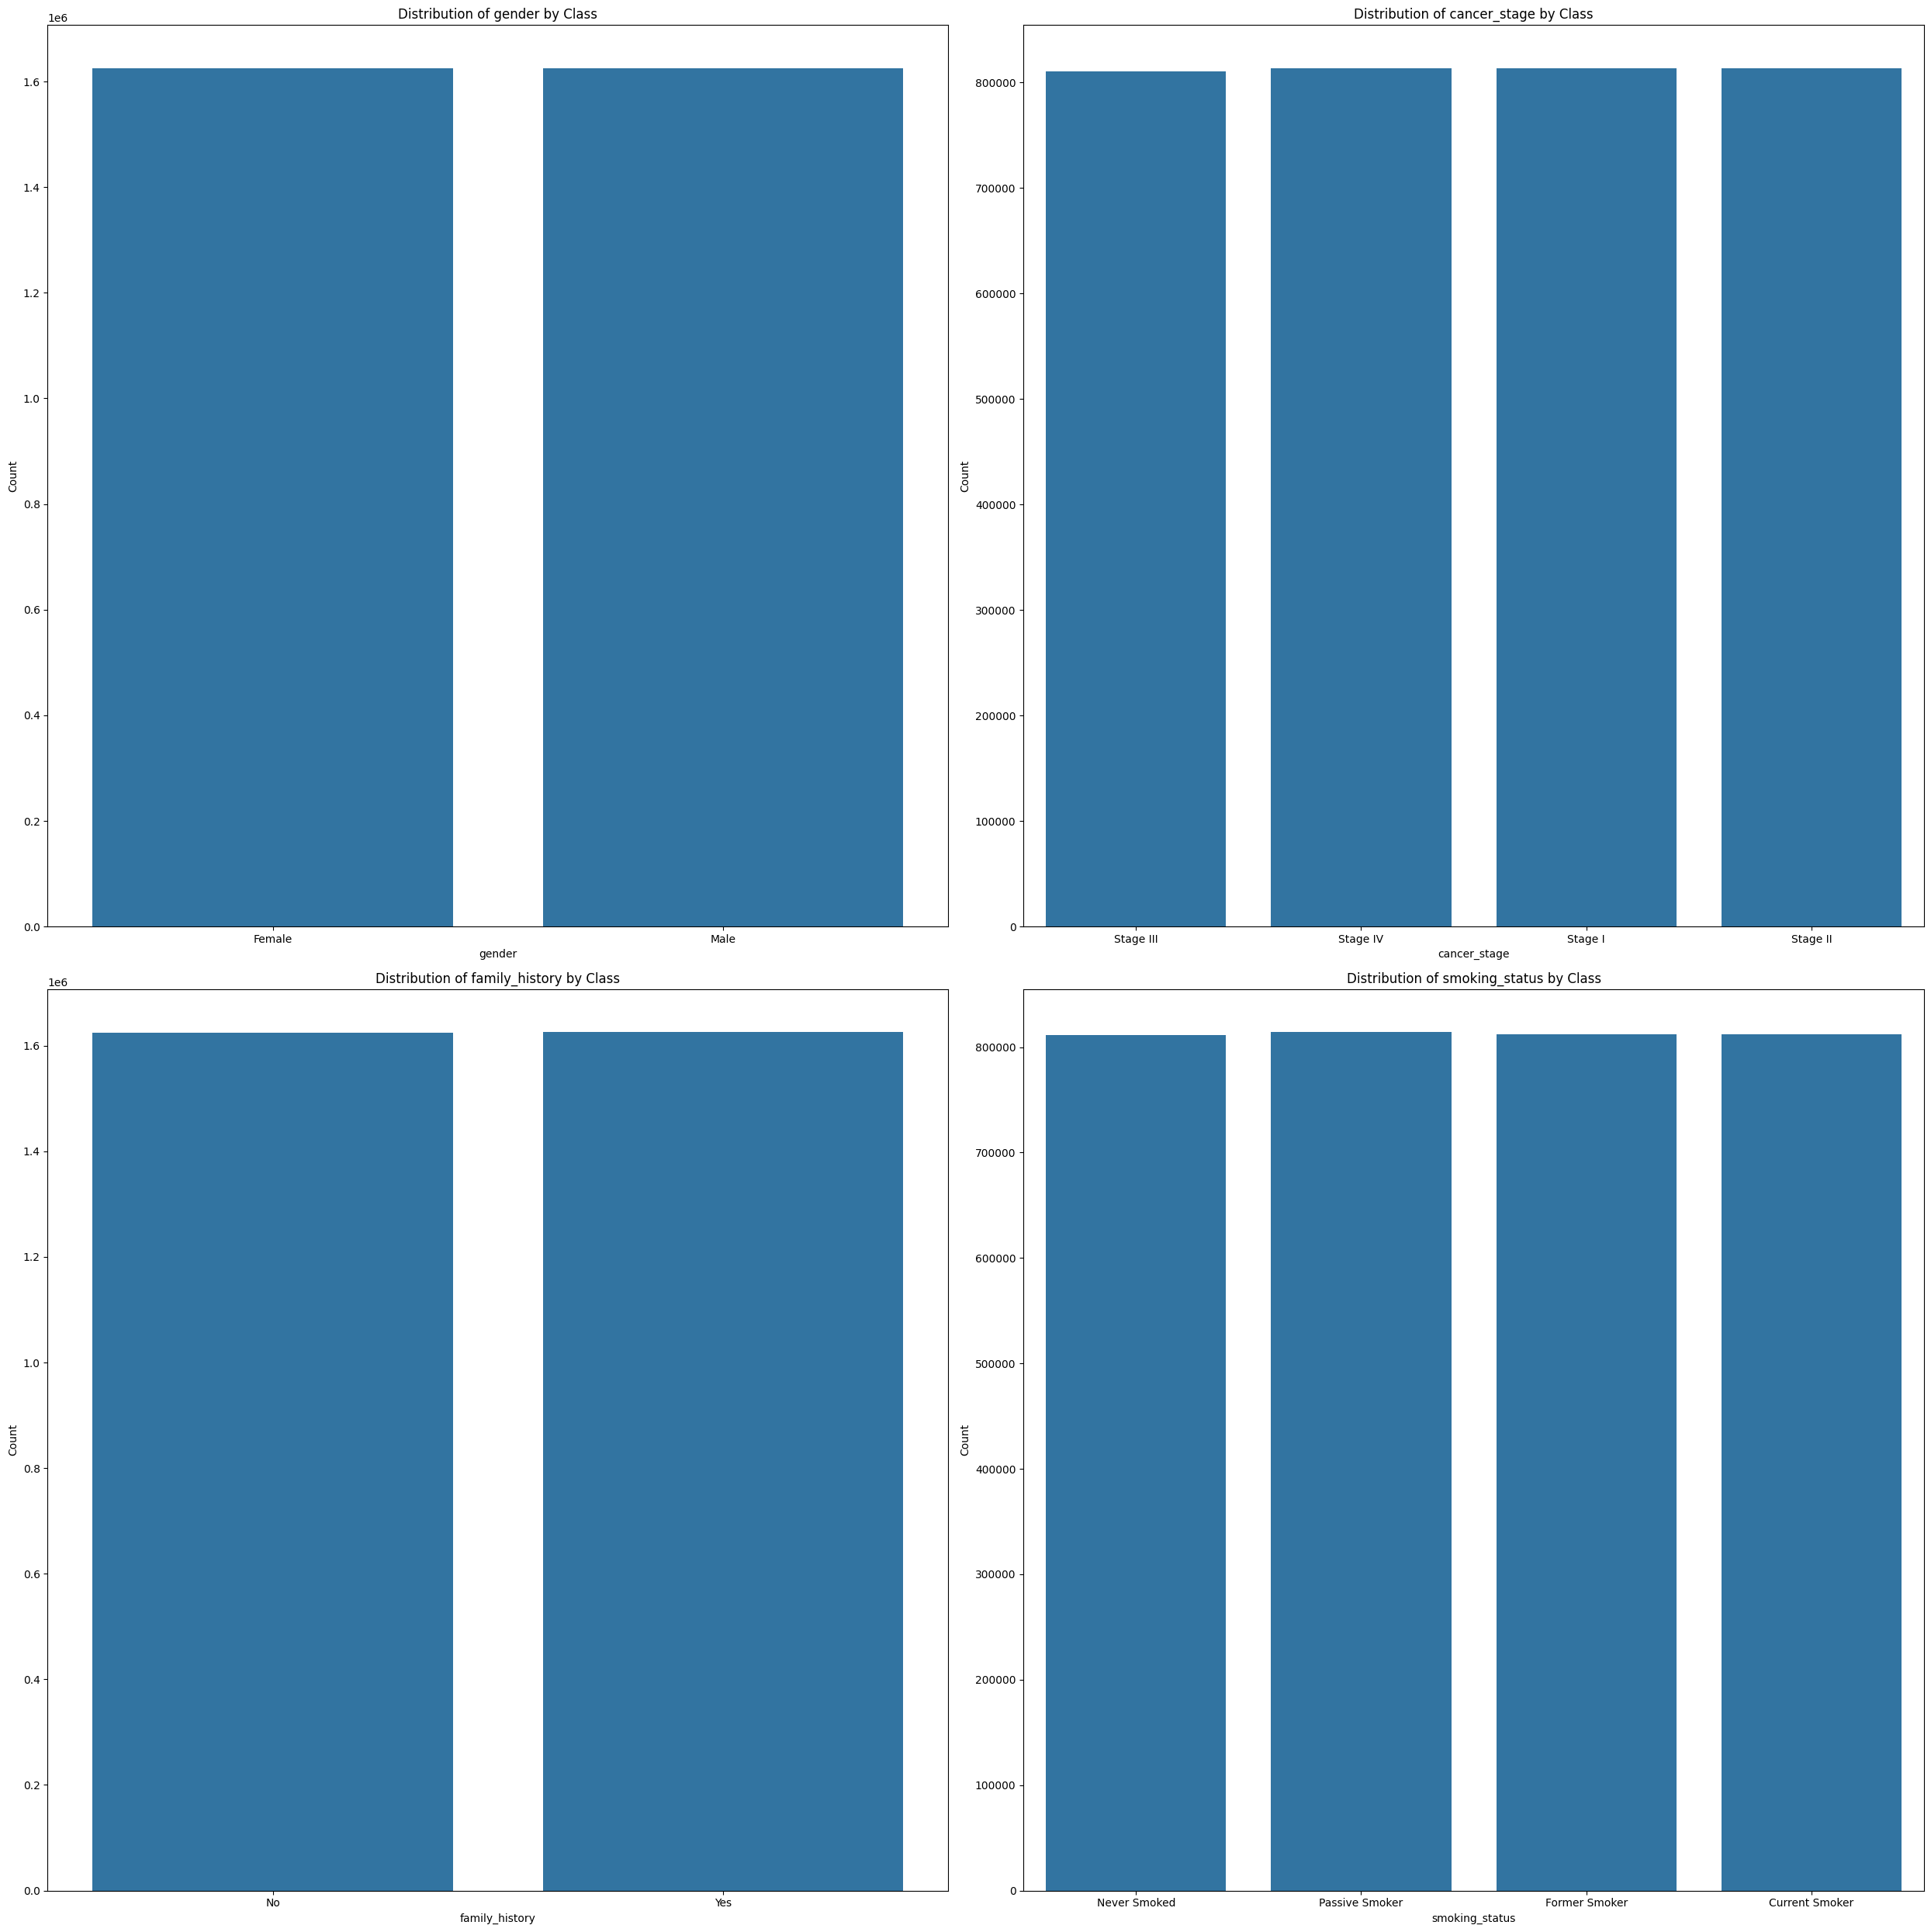

In [19]:
plt.figure(figsize=(25, 25))

for i, feature in enumerate(categorical_cols):
    plt.subplot((len(categorical_cols) + 1) // 2, 2, i + 1)  
    sns.countplot(data=data, x=feature)  
    plt.title(f'Distribution of {feature} by Class')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [20]:
data.head()


,age,gender,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer
0,64.0,Female,Stage III,No,Never Smoked,31.1,257,1,1,0,0
1,50.0,Male,Stage III,Yes,Passive Smoker,25.9,208,1,0,0,0
2,65.0,Male,Stage IV,No,Never Smoked,18.9,193,0,0,0,0
3,51.0,Female,Stage III,Yes,Former Smoker,34.6,249,1,1,1,0
4,37.0,Male,Stage I,Yes,Never Smoked,40.2,262,0,0,0,0


In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
from sklearn.cluster import KMeans


In [22]:
numerical_cols

Index(['age', 'bmi', 'cholesterol_level', 'hypertension', 'asthma',
       'cirrhosis', 'other_cancer'],
      dtype='object')

In [23]:
categorical_cols

Index(['gender', 'cancer_stage', 'family_history', 'smoking_status'], dtype='object')

In [24]:
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [25]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le




In [26]:
data.head()

,age,gender,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer
0,0.899921,0,2,0,2,0.072537,0.537704,0.577600,1.064628,-0.541261,-0.310683
1,-0.499908,1,2,1,3,-0.548619,-0.590068,0.577600,-0.939295,-0.541261,-0.310683
2,0.999909,1,3,0,2,-1.384790,-0.935305,-1.731301,-0.939295,-0.541261,-0.310683
3,-0.399921,0,2,1,1,0.490622,0.353578,0.577600,1.064628,1.847537,-0.310683
4,-1.799750,1,0,1,2,1.159559,0.652782,-1.731301,-0.939295,-0.541261,-0.310683


In [27]:
data['cirrhosis'].value_counts()


cirrhosis
-0.541261    2513605
 1.847537     736395
Name: count, dtype: int64

elbow method

In [28]:
# choosing the number of cluster
# wcss = Within Clusters Sum of Squares
wcss = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

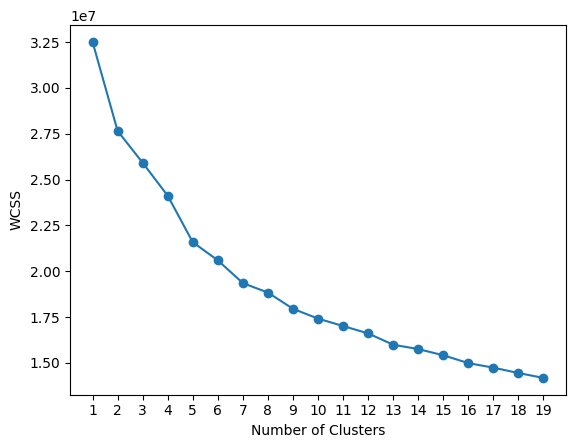

In [29]:
# elbow graph
plt.plot(range(1, 20), wcss, marker='o')
plt.xticks(range(1,20))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [31]:
!pip install kneed


  Using cached kneed-0.8.5-py3-none-any.whl.metadata (5.5 kB)
Using cached kneed-0.8.5-py3-none-any.whl (10 kB)


In [32]:
from kneed import KneeLocator

In [33]:
kl = KneeLocator(range(1,20),wcss,curve='convex',direction='decreasing')
kl.elbow

np.int64(7)

In [34]:
kmeans = KMeans(n_clusters=7, random_state=42)
dataset['Cluster'] = kmeans.fit_predict(data)

In [35]:
treatment_counts = dataset['treatment_type'].value_counts()
print(treatment_counts)

treatment_type
Surgery         813480
Chemotherapy    812702
Radiation       812263
Combined        811555
Name: count, dtype: int64


In [36]:
dataset['Cluster'].value_counts()

Cluster
1    757978
6    636103
0    453920
3    453387
2    341811
5    320712
4    286089
Name: count, dtype: int64

In [37]:
cluster_summary = dataset.groupby('Cluster')['treatment_type'].value_counts()
print(cluster_summary)


Cluster  treatment_type
0        Radiation         113747
         Surgery           113596
         Combined          113296
         Chemotherapy      113281
1        Surgery           190126
         Combined          189646
         Chemotherapy      189312
         Radiation         188894
2        Surgery            85852
         Combined           85420
         Radiation          85338
         Chemotherapy       85201
3        Chemotherapy      113658
         Surgery           113580
         Radiation         113284
         Combined          112865
4        Chemotherapy       71668
         Surgery            71505
         Radiation          71493
         Combined           71423
5        Radiation          80395
         Chemotherapy       80349
         Combined           80045
         Surgery            79923
6        Chemotherapy      159233
         Radiation         159112
         Surgery           158898
         Combined          158860
Name: count, dtype: int6

In [38]:
treatment_by_cluster = dataset.groupby(['Cluster', 'treatment_type']).size().unstack()
print(treatment_by_cluster)

treatment_type  Chemotherapy  Combined  Radiation  Surgery
Cluster                                                   
0                     113281    113296     113747   113596
1                     189312    189646     188894   190126
2                      85201     85420      85338    85852
3                     113658    112865     113284   113580
4                      71668     71423      71493    71505
5                      80349     80045      80395    79923
6                     159233    158860     159112   158898


In [39]:
data.head()

,age,gender,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer
0,0.899921,0,2,0,2,0.072537,0.537704,0.577600,1.064628,-0.541261,-0.310683
1,-0.499908,1,2,1,3,-0.548619,-0.590068,0.577600,-0.939295,-0.541261,-0.310683
2,0.999909,1,3,0,2,-1.384790,-0.935305,-1.731301,-0.939295,-0.541261,-0.310683
3,-0.399921,0,2,1,1,0.490622,0.353578,0.577600,1.064628,1.847537,-0.310683
4,-1.799750,1,0,1,2,1.159559,0.652782,-1.731301,-0.939295,-0.541261,-0.310683


In [40]:
dataset.head()

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,Cluster
0,1,64.0,Female,Germany,2016-04-07,Stage III,2016-04-21,No,Never Smoked,31.1,257,1,1,0,0,Combined,2017-11-15,0,3
1,2,50.0,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,Yes,Passive Smoker,25.9,208,1,0,0,0,Radiation,2024-04-25,0,1
2,3,65.0,Male,Romania,2023-04-07,Stage IV,2023-04-12,No,Never Smoked,18.9,193,0,0,0,0,Surgery,2025-03-11,0,6
3,4,51.0,Female,Latvia,2016-02-07,Stage III,2016-02-13,Yes,Former Smoker,34.6,249,1,1,1,0,Surgery,2017-04-14,1,2
4,5,37.0,Male,Greece,2023-12-01,Stage I,2023-12-03,Yes,Never Smoked,40.2,262,0,0,0,0,Chemotherapy,2024-09-20,0,6


In [45]:
def get_user_input():
    age = int(input("Enter age: "))
    gender = input("Enter gender (Male/Female): ")
    cancer_stage = input("Enter cancer stage (e.g., Stage I, Stage II, Stage III, Stage IV): ")
    family_history = input("Is there a family history of cancer? (Yes/No): ")
    smoking_status = input("Enter smoking status (e.g., Never Smoker, Former Smoker, Current Smoker): ")
    bmi = float(input("Enter BMI: "))
    cholesterol_level = float(input("Enter cholesterol level: "))
    hypertension = int(input("Enter hypertension status (1 for Yes, 0 for No): "))
    asthma = int(input("Enter asthma status (1 for Yes, 0 for No): "))
    cirrhosis = int(input("Enter cirrhosis status (1 for Yes, 0 for No): "))
    other_cancer = int(input("Enter other cancer status (1 for Yes, 0 for No): "))

    return pd.DataFrame({
        'age': [age],
        'gender': [gender],
        'cancer_stage': [cancer_stage],
        'family_history': [family_history],
        'smoking_status': [smoking_status],
        'bmi': [bmi],
        'cholesterol_level': [cholesterol_level],
        'hypertension': [hypertension],
        'asthma': [asthma],
        'cirrhosis': [cirrhosis],
        'other_cancer': [other_cancer]
    })

manual_data = get_user_input()
# print(manual_data.head())

manual_data[numerical_cols] = scaler.transform(manual_data[numerical_cols])
for col in categorical_cols:
    manual_data[col] = label_encoders[col].transform(manual_data[col])

predicted_cluster = kmeans.predict(manual_data)

recommended_treatment = dataset[dataset['Cluster'] == predicted_cluster[0]]['treatment_type'].mode()[0]
print(f"Recommended Treatment: {recommended_treatment}")


Recommended Treatment: Surgery


based on id

In [40]:
def recommend_treatments(cluster_label):
    cluster_data = dataset[dataset['Cluster'] == cluster_label]
    recommended_treatment = cluster_data['treatment_type'].mode().values[0]
    
    return recommended_treatment

user_id = int(input("Enter user ID: "))
user_cluster = dataset.loc[user_id, 'Cluster']
recommended_treatment = recommend_treatments(user_cluster)

print(f"Recommended treatment for user {user_id}: {recommended_treatment}")

Recommended treatment for user 56: Radiation


Pipeline 

In [41]:
dataset = pd.read_csv('lung_cancer_mortality_data_large_v2.csv')

In [42]:
data = dataset.copy()

In [43]:
data = data.drop(['id','country','diagnosis_date','beginning_of_treatment_date','treatment_type','end_treatment_date','survived'],axis=1)

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [45]:
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numerical_cols),
        ('cat', ohe, categorical_cols)
    ]
)


In [46]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('kmeans', kmeans)])
    pipeline.fit(data)
    wcss.append(kmeans.inertia_)

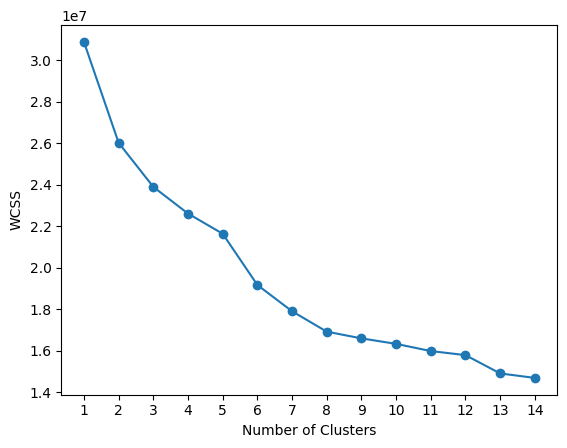

In [47]:
plt.plot(range(1, 15), wcss, marker='o')
plt.xticks(range(1, 15))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()



In [48]:
kl = KneeLocator(range(1, 15), wcss, curve='convex', direction='decreasing')
optimal_k = kl.elbow
print(f"The optimal number of clusters is: {optimal_k}")

The optimal number of clusters is: 7


In [49]:
kmeans_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=7, random_state=42))
])

kmeans_pipeline.fit(data)

dataset['Cluster'] = kmeans_pipeline.predict(data)


In [50]:
dataset['treatment_type'].value_counts()

treatment_type
Surgery         813480
Chemotherapy    812702
Radiation       812263
Combined        811555
Name: count, dtype: int64

In [51]:
dataset['Cluster'].value_counts()

Cluster
2    635254
4    563741
1    515608
0    435000
3    429040
6    385268
5    286089
Name: count, dtype: int64

In [52]:
cluster_summary = dataset.groupby('Cluster')['treatment_type'].value_counts()
print(cluster_summary)


Cluster  treatment_type
0        Surgery           109014
         Chemotherapy      108779
         Radiation         108634
         Combined          108573
1        Surgery           129501
         Combined          129046
         Radiation         128549
         Chemotherapy      128512
2        Chemotherapy      159103
         Radiation         158812
         Combined          158734
         Surgery           158605
3        Chemotherapy      107449
         Surgery           107413
         Radiation         107396
         Combined          106782
4        Chemotherapy      141215
         Radiation         141128
         Surgery           140794
         Combined          140604
5        Chemotherapy       71668
         Surgery            71505
         Radiation          71493
         Combined           71423
6        Surgery            96648
         Combined           96393
         Radiation          96251
         Chemotherapy       95976
Name: count, dtype: int6

In [53]:
treatment_by_cluster = dataset.groupby(['Cluster', 'treatment_type']).size().unstack()
print(treatment_by_cluster)

treatment_type  Chemotherapy  Combined  Radiation  Surgery
Cluster                                                   
0                     108779    108573     108634   109014
1                     128512    129046     128549   129501
2                     159103    158734     158812   158605
3                     107449    106782     107396   107413
4                     141215    140604     141128   140794
5                      71668     71423      71493    71505
6                      95976     96393      96251    96648


In [54]:

def get_user_input():
    age = int(input("Enter age: "))
    gender = input("Enter gender (Male/Female): ")
    cancer_stage = input("Enter cancer stage (e.g., Stage I, Stage II, Stage III, Stage IV): ")
    family_history = input("Is there a family history of cancer? (Yes/No): ")
    smoking_status = input("Enter smoking status (e.g., Never Smoker, Former Smoker, Current Smoker): ")
    bmi = float(input("Enter BMI: "))
    cholesterol_level = float(input("Enter cholesterol level: "))
    hypertension = int(input("Enter hypertension status (1 for Yes, 0 for No): "))
    asthma = int(input("Enter asthma status (1 for Yes, 0 for No): "))
    cirrhosis = int(input("Enter cirrhosis status (1 for Yes, 0 for No): "))
    other_cancer = int(input("Enter other cancer status (1 for Yes, 0 for No): "))

    return pd.DataFrame({
        'age': [age],
        'gender': [gender],
        'cancer_stage': [cancer_stage],
        'family_history': [family_history],
        'smoking_status': [smoking_status],
        'bmi': [bmi],
        'cholesterol_level': [cholesterol_level],
        'hypertension': [hypertension],
        'asthma': [asthma],
        'cirrhosis': [cirrhosis],
        'other_cancer': [other_cancer]
    })

manual_data = get_user_input()


cluster = kmeans_pipeline.predict(manual_data)

recommended_treatment = dataset[dataset['Cluster'] == cluster[0]]['treatment_type'].mode()[0]
print(f"Recommended Treatment: {recommended_treatment}")


Recommended Treatment: Surgery


k-mens based on dieseas

In [55]:
dataset = pd.read_csv('lung_cancer_mortality_data_large_v2.csv')

In [56]:
dataset.head()

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Female,Germany,2016-04-07,Stage III,2016-04-21,No,Never Smoked,31.1,257,1,1,0,0,Combined,2017-11-15,0
1,2,50.0,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,Yes,Passive Smoker,25.9,208,1,0,0,0,Radiation,2024-04-25,0
2,3,65.0,Male,Romania,2023-04-07,Stage IV,2023-04-12,No,Never Smoked,18.9,193,0,0,0,0,Surgery,2025-03-11,0
3,4,51.0,Female,Latvia,2016-02-07,Stage III,2016-02-13,Yes,Former Smoker,34.6,249,1,1,1,0,Surgery,2017-04-14,1
4,5,37.0,Male,Greece,2023-12-01,Stage I,2023-12-03,Yes,Never Smoked,40.2,262,0,0,0,0,Chemotherapy,2024-09-20,0


In [57]:
data = dataset[['cancer_stage','bmi','cholesterol_level','hypertension','asthma','cirrhosis','other_cancer']]

In [58]:
data.head()

,cancer_stage,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer
0,Stage III,31.1,257,1,1,0,0
1,Stage III,25.9,208,1,0,0,0
2,Stage IV,18.9,193,0,0,0,0
3,Stage III,34.6,249,1,1,1,0
4,Stage I,40.2,262,0,0,0,0


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250000 entries, 0 to 3249999
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   cancer_stage       object 
 1   bmi                float64
 2   cholesterol_level  int64  
 3   hypertension       int64  
 4   asthma             int64  
 5   cirrhosis          int64  
 6   other_cancer       int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 173.6+ MB


In [60]:
# Identify numerical and categorical columns
# train_data
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

print(numerical_cols)
print(categorical_cols)

Index(['bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis',
       'other_cancer'],
      dtype='object')
Index(['cancer_stage'], dtype='object')


In [61]:
data[numerical_cols].head()

,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer
0,31.1,257,1,1,0,0
1,25.9,208,1,0,0,0
2,18.9,193,0,0,0,0
3,34.6,249,1,1,1,0
4,40.2,262,0,0,0,0


In [62]:
data[categorical_cols].head()

,cancer_stage
0,Stage III
1,Stage III
2,Stage IV
3,Stage III
4,Stage I


In [63]:
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])



C:\Users\Admin\AppData\Local\Temp\ipykernel_11788\4239620335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [64]:
le = LabelEncoder()
data[categorical_cols[0]] = le.fit_transform(data[categorical_cols[0]])


C:\Users\Admin\AppData\Local\Temp\ipykernel_11788\1696601150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[categorical_cols[0]] = le.fit_transform(data[categorical_cols[0]])


In [65]:
data.head()

,cancer_stage,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer
0,2,0.072537,0.537704,0.577600,1.064628,-0.541261,-0.310683
1,2,-0.548619,-0.590068,0.577600,-0.939295,-0.541261,-0.310683
2,3,-1.384790,-0.935305,-1.731301,-0.939295,-0.541261,-0.310683
3,2,0.490622,0.353578,0.577600,1.064628,1.847537,-0.310683
4,0,1.159559,0.652782,-1.731301,-0.939295,-0.541261,-0.310683


In [66]:
# choosing the number of cluster
# wcss = Within Clusters Sum of Squares
wcss = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

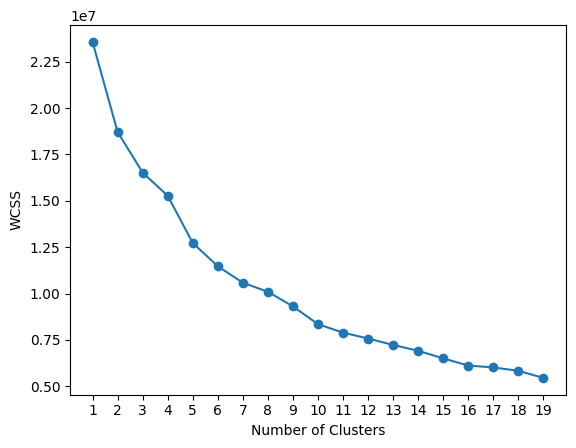

In [67]:
# elbow graph
plt.plot(range(1, 20), wcss, marker='o')
plt.xticks(range(1,20))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [68]:
from kneed import KneeLocator
kl = KneeLocator(range(1,20),wcss,curve='convex',direction='decreasing')
kl.elbow

6

In [69]:
kmeans = KMeans(n_clusters=6, random_state=42)
dataset['Cluster'] = kmeans.fit_predict(data)

In [70]:
dataset.head()

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,Cluster
0,1,64.0,Female,Germany,2016-04-07,Stage III,2016-04-21,No,Never Smoked,31.1,257,1,1,0,0,Combined,2017-11-15,0,0
1,2,50.0,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,Yes,Passive Smoker,25.9,208,1,0,0,0,Radiation,2024-04-25,0,1
2,3,65.0,Male,Romania,2023-04-07,Stage IV,2023-04-12,No,Never Smoked,18.9,193,0,0,0,0,Surgery,2025-03-11,0,5
3,4,51.0,Female,Latvia,2016-02-07,Stage III,2016-02-13,Yes,Former Smoker,34.6,249,1,1,1,0,Surgery,2017-04-14,1,2
4,5,37.0,Male,Greece,2023-12-01,Stage I,2023-12-03,Yes,Never Smoked,40.2,262,0,0,0,0,Chemotherapy,2024-09-20,0,5


In [71]:
cluster_summary = dataset.groupby('Cluster')['treatment_type'].value_counts()
print(cluster_summary)


Cluster  treatment_type
0        Surgery           212077
         Chemotherapy      211855
         Radiation         211682
         Combined          210910
1        Surgery           103158
         Combined          103127
         Chemotherapy      102434
         Radiation         102281
2        Surgery           164873
         Radiation         164820
         Chemotherapy      164607
         Combined          164557
3        Surgery           112887
         Radiation         112829
         Chemotherapy      112783
         Combined          112365
4        Chemotherapy       71668
         Surgery            71505
         Radiation          71493
         Combined           71423
5        Chemotherapy      149355
         Combined          149173
         Radiation         149158
         Surgery           148980
Name: count, dtype: int64


In [72]:
data.head()

,cancer_stage,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer
0,2,0.072537,0.537704,0.577600,1.064628,-0.541261,-0.310683
1,2,-0.548619,-0.590068,0.577600,-0.939295,-0.541261,-0.310683
2,3,-1.384790,-0.935305,-1.731301,-0.939295,-0.541261,-0.310683
3,2,0.490622,0.353578,0.577600,1.064628,1.847537,-0.310683
4,0,1.159559,0.652782,-1.731301,-0.939295,-0.541261,-0.310683


In [73]:
def get_user_input():
    cancer_stage = input("Enter cancer stage (e.g., Stage I, Stage II, Stage III, Stage IV): ")
    bmi = float(input("Enter BMI: "))
    cholesterol_level = float(input("Enter cholesterol level: "))
    hypertension = int(input("Enter hypertension status (1 for Yes, 0 for No): "))
    asthma = int(input("Enter asthma status (1 for Yes, 0 for No): "))
    cirrhosis = int(input("Enter cirrhosis status (1 for Yes, 0 for No): "))
    other_cancer = int(input("Enter other cancer status (1 for Yes, 0 for No): "))

    return pd.DataFrame({
        'cancer_stage': [cancer_stage],
        'bmi': [bmi],
        'cholesterol_level': [cholesterol_level],
        'hypertension': [hypertension],
        'asthma': [asthma],
        'cirrhosis': [cirrhosis],
        'other_cancer': [other_cancer]
    })

manual_data = get_user_input()
# print(manual_data.head())

manual_data[numerical_cols] = scaler.transform(manual_data[numerical_cols])
manual_data[categorical_cols[0]] = le.transform(manual_data[categorical_cols[0]])


predicted_cluster = kmeans.predict(manual_data)

recommended_treatment = dataset[dataset['Cluster'] == predicted_cluster[0]]['treatment_type'].mode()[0]
print(f"Recommended Treatment: {recommended_treatment}")


Recommended Treatment: Chemotherapy
